# Music Genre Classification
An music classifier using multiple machine learning methods

**Neural Networks** • **SVMs** • **Logistic Regression**


---
Authors 
- David Chang
- Denizhan Ene
---
Credits
- Dataset: [GTZAN Dataset](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)
- sklearn: [Docs](https://scikit-learn.org/0.21/documentation.html)
---

For local installations:
```Shell
pip install kaggle
kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
```

# Setup

In this section, we set up the dataset by establishing a directory where it is and where the information will be contained in. The CSV is stored in a shared Google Drive directory that could be accessed by mounting the drive.

We utilize many libraries in the project so this is the place we put all the imports as well.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# |‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
# |                           |
# |          Imports          |
# |                           |
# |___________________________|

import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import librosa

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from PIL import Image

Included in the dataset are two csv files, one with 1000 samples that contain 30 seconds of data. The other one has ~ 9990 samples but only with 3 seconds of data.

We're planning running the model on both.

In [ ]:
# |‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
# |                           |
# |         null check        |
# |                           |
# |___________________________|

# check if any values need filling

#read feature data from csv file
#hosted in google drive
df_30sec = pd.read_csv("/content/drive/MyDrive/ML_genre_classification_nn_project/Data/features_30_sec.csv")
df_3sec = pd.read_csv("/content/drive/MyDrive/ML_genre_classification_nn_project/Data/features_3_sec.csv")
print(f'shape of the first dataset:{df_30sec.shape}')
print(f'shape of the second dataset:{df_3sec.shape}')
# print(df.head())
# print(df2.head())

print(df_30sec.isnull())
print(df_3sec.isnull())
# None

# |‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
# |                           |
# |       sanity check        |
# |                           |
# |___________________________|


label_index = dict()
for i, j in enumerate(df_30sec.label.unique()):
  label_index[j] = i

print(f'dictionary with all labels:{label_index}')


# organize into feature/label
X = df_30sec.drop('filename', axis=1)
y = X.pop('label').to_numpy()


X2 = df_3sec.drop('filename', axis=1)
y2 = X2.pop('label').to_numpy()



# print(X2)
# print(y2)

# encode the labels
y = np.array([label_index[x] for x in y]).reshape((y.shape[0],1))

shape of the first dataset:(1000, 60)
shape of the second dataset:(9990, 60)
     filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  rms_var  \
0       False   False             False            False     False    False   
1       False   False             False            False     False    False   
2       False   False             False            False     False    False   
3       False   False             False            False     False    False   
4       False   False             False            False     False    False   
..        ...     ...               ...              ...       ...      ...   
995     False   False             False            False     False    False   
996     False   False             False            False     False    False   
997     False   False             False            False     False    False   
998     False   False             False            False     False    False   
999     False   False             False            Fal

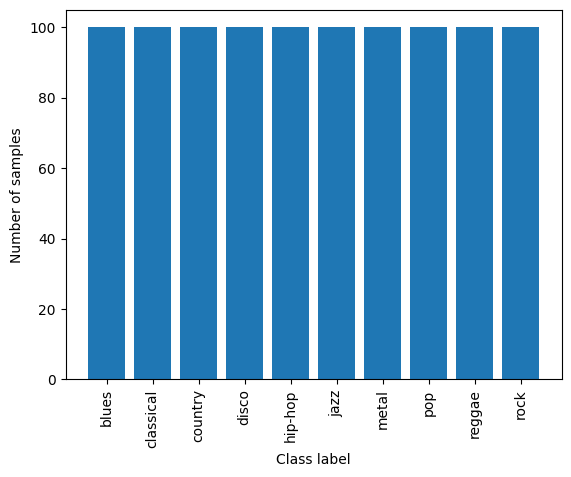

In [ ]:
labels=['blues', 'classical', 'country', 'disco', 'hip-hop', 'jazz', 'metal', 'pop', 'reggae', 'rock'] 
counts = np.zeros(len(labels))
for i in range(len(labels)):
  counts[i] = np.sum(y==i)

plt.bar(np.arange(len(labels)), counts)
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Number of samples')
plt.xlabel('Class label')
plt.show()

In [ ]:
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [60]:
X.info()

AttributeError: ignored

---


Scale Data

In [ ]:
# |‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
# |                           |
# |           TODO!           |
# |                           |
# |___________________________|
# implement normalization?
scalar = preprocessing.StandardScaler()
X = scalar.fit_transform(X)

scalar2 = preprocessing.StandardScaler()
X2 = scalar2.fit_transform(X2)




# split the 30 second data as: 80% training, 20% testing
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=.2, random_state=42)

#split the 3 second data as: 80% training, 20% testing
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X2, y2, test_size=.2, random_state=42)

print(f'30 seconds training examples shape:\t{X_train_30.shape}')
print(f'30 seconds testing examples shape:\t{X_test_30.shape}')
print(f'30 seconds training labels shape:\t{y_train_30.shape}')
print(f'30 seconds testing labels shape:\t{y_test_30.shape}')
print()

print(f'3 seconds training examples shape:\t{X_train_3.shape}')
print(f'3 seconds testing examples shape:\t{X_test_3.shape}')
print(f'3 seconds training labels shape:\t{y_train_3.shape}')
print(f'3 seconds testing labels shape:\t\t{y_test_3.shape}')



30 seconds training examples shape:	(800, 58)
30 seconds testing examples shape:	(200, 58)
30 seconds training labels shape:	(800, 1)
30 seconds testing labels shape:	(200, 1)

3 seconds training examples shape:	(7992, 58)
3 seconds testing examples shape:	(1998, 58)
3 seconds training labels shape:	(7992,)
3 seconds testing labels shape:		(1998,)


In [56]:
#Neural Networks
from sklearn.model_selection import GridSearchCV


parameter_space={
    'hidden_layer_sizes': [(10,10,10),(10,20,20,20,10),(20,30,30,30,20),(10,30,60,10), (20,20,20), (5,10,15,20),(1,2,3,4,5,10),(10,20,20),(20,30,20),(30,30,30),(40,40,40), (50,50,50)],
    'activation':['tanh','relu','logistic'],
    'solver':['sgd','adam'],
    'learning_rate':['constant','adaptive'],
    'alpha': [0.01,0.005,0.001]
}


hidden_layers = (50,50,50)
mlp_30 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), max_iter=200)
mlp_3 = MLPClassifier(hidden_layer_sizes=hidden_layers, activation='tanh', solver='adam', max_iter=200, learning_rate='constant')

history = mlp_30.fit(X_train_30, y_train_30)
# mlp_3.fit(X_train_3, y_train_3)

# mlp_30 = MLPClassifier(max_iter=200)
# mlp_3 = MLPClassifier(max_iter=100)

# clf_30 = GridSearchCV(mlp_30,parameter_space,n_jobs=4,cv=5)
# clf_30.fit(X_train_30, y_train_30)

# clf_3 = GridSearchCV(mlp_3,parameter_space,n_jobs=4,cv=5)
# clf_3.fit(X_train_3, y_train_3)

# print(f'Best Parameters found: \n', clf_30.best_params_)
# print(f'Best Parameters found: \n', clf_3.best_params_)



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
plt.plot(history.loss_curve_, label='training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

AttributeError: ignored

In [ ]:
clf_30.cv_results_

In [ ]:
results = clf_30.cv_results_
params = results['params']
mean_scores = results['mean_test_score']
split0 = results['split0_test_score']
split1 = results['split1_test_score']
split2 = results['split2_test_score']
split3 = results['split3_test_score']
split4 = results['split4_test_score']

In [ ]:
for i, size in enumerate(params):
  plt.bar(str(size['hidden_layer_sizes']), mean_scores[i])
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.ylabel('mean_score')
plt.show()

In [ ]:
for i, size in enumerate(params):
  plt.bar(str(size['activation']), mean_scores[i])
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
for i, size in enumerate(params):
  plt.bar(str(size['solver']), mean_scores[i])
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
for i, size in enumerate(params):
  plt.bar(str(size['learning_rate']), mean_scores[i])
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
for i, size in enumerate(params):
  plt.bar(str(size['alpha']), mean_scores[i])
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
len(clf_30.cv_results_['params'])

3

In [ ]:
clf_30.cv_results_['mean_test_score']

array([0.58625, 0.65   , 0.59625])

In [58]:
predict_train_mlp_30 = mlp_30.predict(X_train_30)
predict_test_mlp_30 = mlp_30.predict(X_test_30)

# predict_train_mlp_3 = mlp_3.predict(X_train_3)
# predict_test_mlp_3 = mlp_3.predict(X_test_3)

In [ ]:
mean_scores = np.array(clf_3.cv_results_['mean_test_score'])
clf_3.cv_results_

In [ ]:
param_names = list(parameter_space.keys())

# loop through each parameter and plot the results
for param_name in param_names:
    param_values = parameter_space[param_name]
    mean_scores = clf_3.cv_results_['mean_test_score']
    std_scores = clf_3.cv_results_['std_test_score']
    print(param_name, param_values,mean_scores,std_scores)

Classification Report on the Training Data of the Neural Network model of 30 seconds sounds
[[80  0  0  0  0  0  0  0  0  0]
 [ 0 87  0  0  0  0  0  0  0  0]
 [ 0  0 73  0  0  0  0  0  0  0]
 [ 0  0  0 79  0  0  0  0  0  0]
 [ 0  0  0  0 85  0  0  0  0  0]
 [ 0  0  0  0  0 78  0  0  0  0]
 [ 0  0  0  0  0  0 74  0  0  1]
 [ 0  0  0  0  0  0  0 87  0  0]
 [ 0  0  0  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        79
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        78
           6       1.00      0.99      0.99        75
           7       1.00      1.00      1.00        87
           8       1.00      1.00      1.00        77
           9       0.99      1.00   

<Axes: >

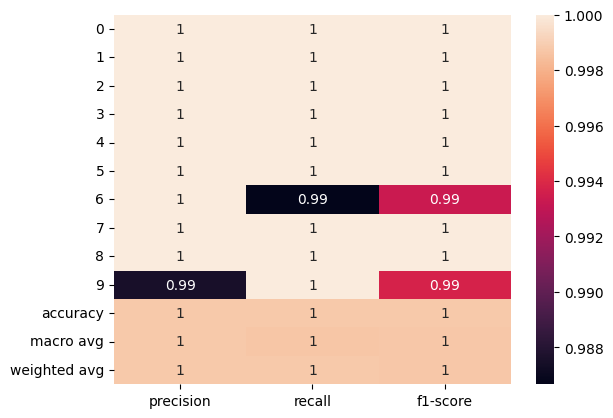

In [59]:
#CELL TO OUTPUT 30 SECOND SOUNDS

print("Classification Report on the Training Data of the Neural Network model of 30 seconds sounds")
print(confusion_matrix(y_train_30, predict_train_mlp_30))
print(classification_report(y_train_30, predict_train_mlp_30))
print("=====================================================")
print("\nClassification Report on the Test Data of the Neural Network model of 30 seconds sounds")
print(confusion_matrix(y_test_30, predict_test_mlp_30))
print(classification_report(y_test_30, predict_test_mlp_30))

import seaborn as sns

clf_report = classification_report(y_train_30, predict_train_mlp_30, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
# clf_report = classification_report(y_test_30, predict_test_mlp_30, output_dict=True)
# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


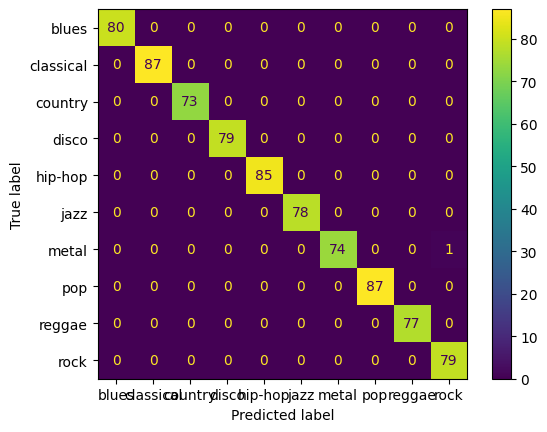

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_30, predict_train_mlp_30), display_labels=labels)
disp.plot()
plt.show()


















In [ ]:
#OUTPUT CELL OF 3 SECOND SOUNDS NN

print("Classification Report on the Training Data of the Neural Network model of 3 seconds sounds")
print(confusion_matrix(y_train_3, predict_train_mlp_3))
print(classification_report(y_train_3, predict_train_mlp_3))
print("=====================================================")
print("\nClassification Report on the Test Data of the Neural Network model of 3 seconds sounds")
print(confusion_matrix(y_test_3, predict_test_mlp_3))
print(classification_report(y_test_3, predict_test_mlp_3))

Classification Report on the Training Data of the Neural Network model of 3 seconds sounds
[[792   0   0   0   0   0   0   0   0   0]
 [  0 795   0   0   0   0   0   0   0   0]
 [  0   0 810   0   0   0   1   0   0   0]
 [  0   0   0 800   0   0   0   0   0   0]
 [  0   0   0   0 780   0   0   0   0   0]
 [  0   0   0   0   0 808   0   0   0   0]
 [  0   0   0   0   0   0 793   0   0   3]
 [  0   0   0   0   0   0   0 820   0   0]
 [  0   0   0   0   0   0   0   0 789   0]
 [  0   0   0   0   0   0   5   0   0 796]]
              precision    recall  f1-score   support

       blues       1.00      1.00      1.00       792
   classical       1.00      1.00      1.00       795
     country       1.00      1.00      1.00       811
       disco       1.00      1.00      1.00       800
      hiphop       1.00      1.00      1.00       780
        jazz       1.00      1.00      1.00       808
       metal       0.99      1.00      0.99       796
         pop       1.00      1.00      1.00  

In [ ]:
#Logistic Regression with One versus All approach with 30 and 3 second sounds

clf_30 = LogisticRegression(multi_class='ovr',max_iter=300)
clf_30.fit(X_train_30, y_train_30)

clf_3 = LogisticRegression(multi_class='ovr',max_iter=300)
clf_3.fit(X_train_3, y_train_3)


predict_train_logistic_30 = clf_30.predict(X_train_30)
predict_test_logistic_30 = clf_30.predict(X_test_30)

predict_train_logistic_3 = clf_3.predict(X_train_3)
predict_test_logistic_3 = clf_3.predict(X_test_3)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#OUTPUT CELL OF 30 SECOND SOUNDS LOGISTIC REGRESSION

#print(confusion_matrix(y_train_30, predict_train_logistic))
print("Classification Report on the Training Data of the Logistic Classification model of 30 seconds sounds")
print(classification_report(y_train_30, predict_train_logistic_30))
print("=====================================================")
#print(confusion_matrix(y_test_30, predict_test_logistic))
print("\nClassification Report on the Test Data of the Logistic Classification model of 30 seconds sounds")
print(classification_report(y_test_30, predict_test_logistic_30))


import seaborn as sns

clf_report = classification_report(y_test_30, predict_test_logistic_30, output_dict=True)


Classification Report on the Training Data of the Logistic Classification model of 30 seconds sounds


NameError: ignored

In [ ]:
#OUTPUT CELL OF 3 SECOND SOUNDS LOGISTIC REGRESSION

#print(confusion_matrix(y_train_3, predict_train_logistic_3))
print("Classification Report on the Training Data of the Logistic Classification model of 3 seconds sounds")
print(classification_report(y_train_3, predict_train_logistic_3))
print("=====================================================")
#print(confusion_matrix(y_test_3, predict_test_logistic))
print("\nClassification Report on the Test Data of the Logistic Classification model of 3 seconds sounds")
print(classification_report(y_test_3, predict_test_logistic_3))

Classification Report on the Training Data of the Logistic Classification model of 3 seconds sounds
              precision    recall  f1-score   support

       blues       0.68      0.73      0.71       792
   classical       0.92      0.96      0.94       795
     country       0.64      0.63      0.64       811
       disco       0.66      0.69      0.67       800
      hiphop       0.72      0.64      0.68       780
        jazz       0.79      0.82      0.81       808
       metal       0.80      0.87      0.83       796
         pop       0.79      0.82      0.80       820
      reggae       0.65      0.64      0.65       789
        rock       0.59      0.47      0.52       801

    accuracy                           0.73      7992
   macro avg       0.72      0.73      0.72      7992
weighted avg       0.72      0.73      0.72      7992


Classification Report on the Test Data of the Logistic Classification model of 3 seconds sounds
              precision    recall  f1-score 

In [ ]:
# Define the path to the folder containing the Mel spectrograms
folder_path = '/content/drive/MyDrive/ML_genre_classification_nn_project/Data1/images_original'

# Load the data from each file
X = []
y = []
for genre in ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']:
    for i in range(0, 10):
        if(i < 10):
          i = genre + "0000" + str(i)
        else:
          i = genre + "000" + str(i)
        img = Image.open(f"{folder_path}/{genre}/{i}.png")
        X.append(np.array(img))
        y.append(genre)

# Convert the genre labels to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

# Shuffle the data
X, y = shuffle(X, y)

# Convert data and labels to NumPy arrays
data = np.array(X)
labels = np.array(y)



# Normalize the input data
max_pixel_value = np.max(data)
data = data.astype('float32') / max_pixel_value
labels = to_categorical(labels)
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)




# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(np.argmax(y_test, axis=-1), y_pred, target_names=le.classes_))

FileNotFoundError: ignored